# 잔차분석

## 잔차(desidual)
* 예측값에 대한 오차를 의미함

## 잔차 분석
* 선형성
* 정규성
* 등분산성
* 독립성

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as ssa
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
plt.rcParams["font.family"]="BM YEONSUNG"
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams["font.size"]=10
plt.rcParams["axes.unicode_minus"]=False

In [9]:
D=pd.read_excel("https://data.hossam.kr/E04/cars.xlsx")
data=pd.DataFrame(D)

## 회귀분석 실시

In [16]:
import statsmodels.stats.anova as anova
import statsmodels.formula.api as smf

In [19]:
data.columns

Index(['speed', 'dist'], dtype='object')

In [31]:
test=sm.OLS(endog=data[data.columns[0]],exog=sm.add_constant(data[data.columns[1]]))

In [35]:
result=test.fit()

## 단순회귀분석

In [45]:
step1=pd.merge(data,pd.DataFrame(result.fittedvalues),left_index=True,right_index=True).rename(columns={0:"predict"})

In [46]:
step1

,speed,dist,predict
0,4,2,8.615041
1,4,10,9.939581
2,7,4,8.946176
3,7,22,11.926392
4,8,16,10.932987
5,9,10,9.939581
6,10,18,11.264122
7,10,26,12.588663
8,10,34,13.913203
9,11,17,11.098554


## 잔차 계산해보기
+ `result.resid`해도 됌

In [48]:
step1["residual"]=step1["speed"]-step1["predict"]

In [50]:
step1

,speed,dist,predict,residual
0,4,2,8.615041,-4.615041
1,4,10,9.939581,-5.939581
2,7,4,8.946176,-1.946176
3,7,22,11.926392,-4.926392
4,8,16,10.932987,-2.932987
5,9,10,9.939581,-0.939581
6,10,18,11.264122,-1.264122
7,10,26,12.588663,-2.588663
8,10,34,13.913203,-3.913203
9,11,17,11.098554,-0.098554


## 시각화 해보자

### 잔차의 선형성

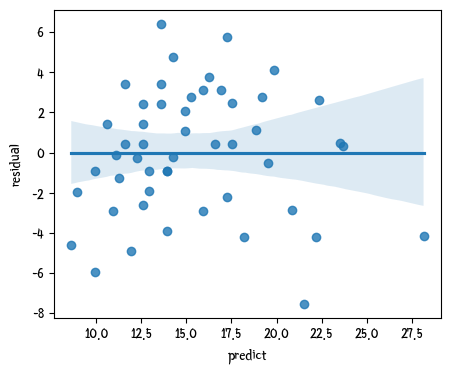

In [60]:
plt.rcParams["figure.figsize"]=(5,4)
plt.figure()
sb.regplot(data,x=step1["predict"],y=step1["residual"])
# sb.lineplot(data,y=step1["predict"],x=step1["residual"])
plt.show()
plt.close()